In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv('muc123a.csv')

# Create a variable that identifies people in the same household:
df['household_id'] = None

df['household_id'] = df.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)

# Create a variable that stores the number of people living in one household
df['household_size'] = df.groupby(['tinh','huyen','xa','diaban','hoso'])['matv'].transform('max')
df['household_size']

print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'muc123a.csv'

In [470]:
# Remove all non-head people from the dataset
df = df[df['m1ac3'] == 1]
# Remove all female heads from the dataset
df = df[df['m1ac2'] == 1]
df.count()
# Limit dataset columns to only relevant variables
df = df[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv', 'm1ac3', 'm1ac2', 'household_size','m1ac5', 'household_id']]
# Limit dataset to only heads over 25 years old
df = df[df['m1ac5'] >= 25]
df

,tinh,huyen,xa,diaban,hoso,matv,m1ac3,m1ac2,household_size,m1ac5,household_id
3,101,1,3.0,1,14,1,1,1,3,64,"101, 1, 3, 1, 14"
6,101,1,3.0,1,15,1,1,1,2,61,"101, 1, 3, 1, 15"
8,101,1,9.0,19,15,1,1,1,2,50,"101, 1, 9, 19, 15"
13,101,1,9.0,19,20,1,1,1,3,50,"101, 1, 9, 19, 20"
16,101,1,15.0,50,13,1,1,1,4,35,"101, 1, 15, 50, 13"
...,...,...,...,...,...,...,...,...,...,...,...
38231,823,13,12.0,25,15,1,1,1,6,78,"823, 13, 12, 25, 15"
38237,823,13,12.0,25,19,1,1,1,4,32,"823, 13, 12, 25, 19"
38241,823,13,17.0,1,13,1,1,1,3,57,"823, 13, 17, 1, 13"
38244,823,13,17.0,1,14,1,1,1,5,45,"823, 13, 17, 1, 14"


In [ ]:
df4 = pd.read_csv('muc4a.csv')
# Create a variable that identifies people in the same household:
df4['household_id'] = df4.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)

# Fill people with no income in cell to become 0
df4['m4ac11'] = df4['m4ac11'].fillna(0)
df4['m4ac12f'] = df4['m4ac12f'].fillna(0)
df4['m4ac21'] = df4['m4ac21'].fillna(0)
df4['m4ac22f'] = df4['m4ac22f'].fillna(0)
df4['m4ac25'] = df4['m4ac25'].fillna(0)

# Keep only relevant variables
df_income = df4[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv', 'm4ac11', 'm4ac12f', 'm4ac21', 'm4ac22f', 'm4ac25', 'household_id']]
df_income

,tinh,huyen,xa,diaban,hoso,matv,m4ac11,m4ac12f,m4ac21,m4ac22f,m4ac25,household_id
0,101,1,3.0,1,13,1,0.0,0,0.0,0,0.0,"101, 1, 3, 1, 13"
1,101,1,3.0,1,13,2,17632.0,918,0.0,0,0.0,"101, 1, 3, 1, 13"
2,101,1,3.0,1,13,3,0.0,0,0.0,0,0.0,"101, 1, 3, 1, 13"
3,101,1,3.0,1,14,1,39528.0,2823,0.0,0,0.0,"101, 1, 3, 1, 14"
4,101,1,3.0,1,14,2,14117.0,0,0.0,0,0.0,"101, 1, 3, 1, 14"
...,...,...,...,...,...,...,...,...,...,...,...,...
35149,823,13,17.0,1,14,4,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 14"
35150,823,13,17.0,1,20,1,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 20"
35151,823,13,17.0,1,20,2,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 20"
35152,823,13,17.0,1,20,3,31399.0,0,0.0,0,0.0,"823, 13, 17, 1, 20"


In [472]:
# Calculate to total individual incomes from different sources of income

df_income.loc[:, 'Total Individual Income'] = (
    df_income['m4ac11'] + df_income['m4ac12f'] +
    df_income['m4ac21'] + df_income['m4ac22f'] + df_income['m4ac25']
)

/var/folders/fb/bd3n51196jg25jmyy378kg_40000gn/T/ipykernel_51603/1222130114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_income.loc[:, 'Total Individual Income'] = (


In [ ]:
# Calculate Total Household Income by grouping people with the same household ID
household_income = df_income.groupby('household_id')['Total Individual Income'].sum().reset_index()
household_income.rename(columns={'Total Individual Income': 'Total Household Income'}, inplace=True)
df_income = df_income.merge(household_income, on='household_id', how='left')
df_income

,tinh,huyen,xa,diaban,hoso,matv,m4ac11,m4ac12f,m4ac21,m4ac22f,m4ac25,household_id,Total Individual Income,Total Household Income
0,101,1,3.0,1,13,1,0.0,0,0.0,0,0.0,"101, 1, 3, 1, 13",0.0,18550.0
1,101,1,3.0,1,13,2,17632.0,918,0.0,0,0.0,"101, 1, 3, 1, 13",18550.0,18550.0
2,101,1,3.0,1,13,3,0.0,0,0.0,0,0.0,"101, 1, 3, 1, 13",0.0,18550.0
3,101,1,3.0,1,14,1,39528.0,2823,0.0,0,0.0,"101, 1, 3, 1, 14",42351.0,56468.0
4,101,1,3.0,1,14,2,14117.0,0,0.0,0,0.0,"101, 1, 3, 1, 14",14117.0,56468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35149,823,13,17.0,1,14,4,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 14",0.0,0.0
35150,823,13,17.0,1,20,1,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 20",0.0,31399.0
35151,823,13,17.0,1,20,2,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 20",0.0,31399.0
35152,823,13,17.0,1,20,3,31399.0,0,0.0,0,0.0,"823, 13, 17, 1, 20",31399.0,31399.0


In [474]:
# Only including data for household heads
df_income = df_income[df_income['matv'] == 1]
df_income

,tinh,huyen,xa,diaban,hoso,matv,m4ac11,m4ac12f,m4ac21,m4ac22f,m4ac25,household_id,Total Individual Income,Total Household Income
0,101,1,3.0,1,13,1,0.0,0,0.0,0,0.0,"101, 1, 3, 1, 13",0.0,18550.0
3,101,1,3.0,1,14,1,39528.0,2823,0.0,0,0.0,"101, 1, 3, 1, 14",42351.0,56468.0
6,101,1,3.0,1,15,1,0.0,0,0.0,0,0.0,"101, 1, 3, 1, 15",0.0,42351.0
8,101,1,9.0,19,15,1,0.0,0,0.0,0,0.0,"101, 1, 9, 19, 15",0.0,0.0
10,101,1,9.0,19,19,1,0.0,0,0.0,0,0.0,"101, 1, 9, 19, 19",0.0,22040.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35134,823,13,12.0,25,15,1,0.0,0,0.0,0,0.0,"823, 13, 12, 25, 15",0.0,27677.0
35140,823,13,12.0,25,19,1,0.0,0,0.0,0,0.0,"823, 13, 12, 25, 19",0.0,0.0
35143,823,13,17.0,1,13,1,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 13",0.0,0.0
35146,823,13,17.0,1,14,1,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 14",0.0,0.0


In [ ]:
# Merge income dataset with our original data
df_new = df_income.merge(df, on=['household_id', 'tinh', 'huyen', 'xa', 'diaban', 'hoso', 'matv'], how='inner')
df_new.to_csv("gender+income.csv", index=False)
df_new

,tinh,huyen,xa,diaban,hoso,matv,m4ac11,m4ac12f,m4ac21,m4ac22f,m4ac25,household_id,Total Individual Income,Total Household Income,m1ac3,m1ac2,household_size,m1ac5
0,101,1,3.0,1,14,1,39528.0,2823,0.0,0,0.0,"101, 1, 3, 1, 14",42351.0,56468.0,1,1,3,64
1,101,1,3.0,1,15,1,0.0,0,0.0,0,0.0,"101, 1, 3, 1, 15",0.0,42351.0,1,1,2,61
2,101,1,9.0,19,15,1,0.0,0,0.0,0,0.0,"101, 1, 9, 19, 15",0.0,0.0,1,1,2,50
3,101,1,9.0,19,20,1,33061.0,918,0.0,0,0.0,"101, 1, 9, 19, 20",33979.0,47203.0,1,1,3,50
4,101,1,15.0,50,13,1,79055.0,12800,0.0,0,0.0,"101, 1, 15, 50, 13",91855.0,163382.0,1,1,4,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,1,0.0,0,0.0,0,0.0,"823, 13, 12, 25, 15",0.0,27677.0,1,1,6,78
6893,823,13,12.0,25,19,1,0.0,0,0.0,0,0.0,"823, 13, 12, 25, 19",0.0,0.0,1,1,4,32
6894,823,13,17.0,1,13,1,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 13",0.0,0.0,1,1,3,57
6895,823,13,17.0,1,14,1,0.0,0,0.0,0,0.0,"823, 13, 17, 1, 14",0.0,0.0,1,1,5,45


In [ ]:
#Work with data on Consumption in Education and Healthcare

In [ ]:
# Work with data on consumption

# Consumption of food and drink on holidays

df_holiday = pd.read_csv('muc5a1.csv')
df_holiday['household_id'] = df_holiday.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)
df_holiday

,tinh,huyen,xa,diaban,hoso,m5a1c1,m5a1c1a,m5a1c2a,m5a1c2b,m5a1c3a,m5a1c3b,household_id
0,101,1,3.0,1,13,134.0,NaN,NaN,336.0,NaN,0.0,"101, 1, 3, 1, 13"
1,101,1,3.0,1,13,153.0,NaN,0.5,33.6,0.0,NaN,"101, 1, 3, 1, 13"
2,101,1,3.0,1,13,139.0,NaN,1.0,9.6,0.0,NaN,"101, 1, 3, 1, 13"
3,101,1,3.0,1,13,111.0,NaN,1.0,96.0,0.0,NaN,"101, 1, 3, 1, 13"
4,101,1,3.0,1,13,110.0,NaN,2.0,134.4,0.0,NaN,"101, 1, 3, 1, 13"
...,...,...,...,...,...,...,...,...,...,...,...,...
134646,823,13,17.0,1,20,134.0,NaN,NaN,27.5,NaN,0.0,"823, 13, 17, 1, 20"
134647,823,13,17.0,1,20,153.0,NaN,0.2,10.1,0.0,NaN,"823, 13, 17, 1, 20"
134648,823,13,17.0,1,20,154.0,NaN,NaN,0.0,NaN,27.3,"823, 13, 17, 1, 20"
134649,823,13,17.0,1,20,101.0,NaN,10.0,54.9,10.0,54.6,"823, 13, 17, 1, 20"


In [477]:
print(df_holiday.columns.tolist())

['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'm5a1c1', 'm5a1c1a', 'm5a1c2a', 'm5a1c2b', 'm5a1c3a', 'm5a1c3b', 'household_id']


In [478]:
df_holiday

,tinh,huyen,xa,diaban,hoso,m5a1c1,m5a1c1a,m5a1c2a,m5a1c2b,m5a1c3a,m5a1c3b,household_id
0,101,1,3.0,1,13,134.0,NaN,NaN,336.0,NaN,0.0,"101, 1, 3, 1, 13"
1,101,1,3.0,1,13,153.0,NaN,0.5,33.6,0.0,NaN,"101, 1, 3, 1, 13"
2,101,1,3.0,1,13,139.0,NaN,1.0,9.6,0.0,NaN,"101, 1, 3, 1, 13"
3,101,1,3.0,1,13,111.0,NaN,1.0,96.0,0.0,NaN,"101, 1, 3, 1, 13"
4,101,1,3.0,1,13,110.0,NaN,2.0,134.4,0.0,NaN,"101, 1, 3, 1, 13"
...,...,...,...,...,...,...,...,...,...,...,...,...
134646,823,13,17.0,1,20,134.0,NaN,NaN,27.5,NaN,0.0,"823, 13, 17, 1, 20"
134647,823,13,17.0,1,20,153.0,NaN,0.2,10.1,0.0,NaN,"823, 13, 17, 1, 20"
134648,823,13,17.0,1,20,154.0,NaN,NaN,0.0,NaN,27.3,"823, 13, 17, 1, 20"
134649,823,13,17.0,1,20,101.0,NaN,10.0,54.9,10.0,54.6,"823, 13, 17, 1, 20"


In [479]:
holiday_consumption = df_holiday.groupby('household_id')['m5a1c2b'].sum().reset_index()
holiday_consumption.rename(columns={'m5a1c2b': 'Total Holiday Spending On Food'}, inplace=True)
df_holiday= df_holiday.merge(holiday_consumption, on='household_id', how='left')
print(df_holiday)

        tinh  huyen    xa  diaban  hoso  m5a1c1  m5a1c1a  m5a1c2a  m5a1c2b  \
0        101      1   3.0       1    13   134.0      NaN      NaN    336.0   
1        101      1   3.0       1    13   153.0      NaN      0.5     33.6   
2        101      1   3.0       1    13   139.0      NaN      1.0      9.6   
3        101      1   3.0       1    13   111.0      NaN      1.0     96.0   
4        101      1   3.0       1    13   110.0      NaN      2.0    134.4   
...      ...    ...   ...     ...   ...     ...      ...      ...      ...   
134646   823     13  17.0       1    20   134.0      NaN      NaN     27.5   
134647   823     13  17.0       1    20   153.0      NaN      0.2     10.1   
134648   823     13  17.0       1    20   154.0      NaN      NaN      0.0   
134649   823     13  17.0       1    20   101.0      NaN     10.0     54.9   
134650   823     13  17.0       1    20   139.0      NaN      0.5      4.1   

        m5a1c3a  m5a1c3b        household_id  Total Holiday Spe

In [ ]:
holiday_consumption_received = df_holiday.groupby('household_id')['m5a1c3b'].sum().reset_index()
holiday_consumption_received.rename(columns={'m5a1c3b': 'Total Holiday Spending On Food - Self-Supplied'}, inplace=True)
df_holiday= df_holiday.merge(holiday_consumption_received, on='household_id', how='left')
print(df_holiday)

        tinh  huyen    xa  diaban  hoso  m5a1c1  m5a1c1a  m5a1c2a  m5a1c2b  \
0        101      1   3.0       1    13   134.0      NaN      NaN    336.0   
1        101      1   3.0       1    13   153.0      NaN      0.5     33.6   
2        101      1   3.0       1    13   139.0      NaN      1.0      9.6   
3        101      1   3.0       1    13   111.0      NaN      1.0     96.0   
4        101      1   3.0       1    13   110.0      NaN      2.0    134.4   
...      ...    ...   ...     ...   ...     ...      ...      ...      ...   
134646   823     13  17.0       1    20   134.0      NaN      NaN     27.5   
134647   823     13  17.0       1    20   153.0      NaN      0.2     10.1   
134648   823     13  17.0       1    20   154.0      NaN      NaN      0.0   
134649   823     13  17.0       1    20   101.0      NaN     10.0     54.9   
134650   823     13  17.0       1    20   139.0      NaN      0.5      4.1   

        m5a1c3a  m5a1c3b        household_id  Total Holiday Spe

In [481]:
df_holiday = df_holiday.drop_duplicates(subset='household_id', keep='first')
df_holiday = df_holiday[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id', 'Total Holiday Spending On Food', 'Total Holiday Spending On Food - Self-Supplied']]
df_holiday

,tinh,huyen,xa,diaban,hoso,household_id,Total Holiday Spending On Food,Total Holiday Spending On Food - Self-Supplied
0,101,1,3.0,1,13,"101, 1, 3, 1, 13",1288.3,296.1
17,101,1,3.0,1,14,"101, 1, 3, 1, 14",3473.3,1146.0
40,101,1,3.0,1,15,"101, 1, 3, 1, 15",2957.7,573.0
63,101,1,9.0,19,15,"101, 1, 9, 19, 15",1555.2,0.0
80,101,1,9.0,19,19,"101, 1, 9, 19, 19",1852.8,0.0
...,...,...,...,...,...,...,...,...
134602,823,13,12.0,25,15,"823, 13, 12, 25, 15",278.4,38.2
134612,823,13,12.0,25,19,"823, 13, 12, 25, 19",573.7,81.9
134625,823,13,17.0,1,13,"823, 13, 17, 1, 13",242.5,286.5
134634,823,13,17.0,1,14,"823, 13, 17, 1, 14",482.0,0.0


In [482]:
df_new = df_holiday.merge(df_new, on=[ 'tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id'], how='inner')
df_new

,tinh,huyen,xa,diaban,hoso,household_id,Total Holiday Spending On Food,Total Holiday Spending On Food - Self-Supplied,matv,m4ac11,m4ac12f,m4ac21,m4ac22f,m4ac25,Total Individual Income,Total Household Income,m1ac3,m1ac2,household_size,m1ac5
0,101,1,3.0,1,14,"101, 1, 3, 1, 14",3473.3,1146.0,1,39528.0,2823,0.0,0,0.0,42351.0,56468.0,1,1,3,64
1,101,1,3.0,1,15,"101, 1, 3, 1, 15",2957.7,573.0,1,0.0,0,0.0,0,0.0,0.0,42351.0,1,1,2,61
2,101,1,9.0,19,15,"101, 1, 9, 19, 15",1555.2,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,1,1,2,50
3,101,1,9.0,19,20,"101, 1, 9, 19, 20",1993.9,0.0,1,33061.0,918,0.0,0,0.0,33979.0,47203.0,1,1,3,50
4,101,1,15.0,50,13,"101, 1, 15, 50, 13",5259.8,0.0,1,79055.0,12800,0.0,0,0.0,91855.0,163382.0,1,1,4,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,"823, 13, 12, 25, 15",278.4,38.2,1,0.0,0,0.0,0,0.0,0.0,27677.0,1,1,6,78
6893,823,13,12.0,25,19,"823, 13, 12, 25, 19",573.7,81.9,1,0.0,0,0.0,0,0.0,0.0,0.0,1,1,4,32
6894,823,13,17.0,1,13,"823, 13, 17, 1, 13",242.5,286.5,1,0.0,0,0.0,0,0.0,0.0,0.0,1,1,3,57
6895,823,13,17.0,1,14,"823, 13, 17, 1, 14",482.0,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,1,1,5,45


In [483]:
df_daily = pd.read_csv('muc5a2.csv')
df_daily['household_id'] = df_daily.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)
df_daily

,tinh,huyen,xa,diaban,hoso,m5a2c1,m5a2c1a,m5a2c2,m5a2c3,m5a2c4,m5a2c5,m5a2c6,m5a2c7,m5a2c8,m5a2c9,m5a2c10,household_id
0,101,1,3.0,1,13,133,NaN,4,3.0,1.5,28.8,345.6,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13"
1,101,1,3.0,1,13,117,NaN,12,1.0,1.0,31.7,380.4,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13"
2,101,1,3.0,1,13,131,NaN,4,2.0,1.0,28.8,230.4,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13"
3,101,1,3.0,1,13,103,NaN,3,2.0,1.0,3.8,22.8,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13"
4,101,1,3.0,1,13,124,NaN,3,2.0,1.0,17.3,103.8,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310452,823,13,17.0,1,20,153,NaN,12,2.0,0.1,5.5,132.0,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20"
310453,823,13,17.0,1,20,104,NaN,4,1.0,4.0,9.2,36.8,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20"
310454,823,13,17.0,1,20,139,NaN,6,1.0,0.5,6.4,38.4,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20"
310455,823,13,17.0,1,20,121,NaN,3,3.0,4.0,7.3,65.7,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20"


In [484]:
daily_consumption = df_daily.groupby('household_id')['m5a2c6'].sum().reset_index()
daily_consumption.rename(columns={'m5a2c6': 'Total Daily Spending On Food'}, inplace=True)
df_daily= df_daily.merge(daily_consumption, on='household_id', how='left')
df_daily

,tinh,huyen,xa,diaban,hoso,m5a2c1,m5a2c1a,m5a2c2,m5a2c3,m5a2c4,m5a2c5,m5a2c6,m5a2c7,m5a2c8,m5a2c9,m5a2c10,household_id,Total Daily Spending On Food
0,101,1,3.0,1,13,133,NaN,4,3.0,1.5,28.8,345.6,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8
1,101,1,3.0,1,13,117,NaN,12,1.0,1.0,31.7,380.4,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8
2,101,1,3.0,1,13,131,NaN,4,2.0,1.0,28.8,230.4,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8
3,101,1,3.0,1,13,103,NaN,3,2.0,1.0,3.8,22.8,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8
4,101,1,3.0,1,13,124,NaN,3,2.0,1.0,17.3,103.8,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310452,823,13,17.0,1,20,153,NaN,12,2.0,0.1,5.5,132.0,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20",14746.2
310453,823,13,17.0,1,20,104,NaN,4,1.0,4.0,9.2,36.8,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20",14746.2
310454,823,13,17.0,1,20,139,NaN,6,1.0,0.5,6.4,38.4,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20",14746.2
310455,823,13,17.0,1,20,121,NaN,3,3.0,4.0,7.3,65.7,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20",14746.2


In [485]:
daily_consumption_received = df_daily.groupby('household_id')['m5a2c10'].sum().reset_index()
daily_consumption_received.rename(columns={'m5a2c10': 'Total Daily Spending On Food - Self-Supplied'}, inplace=True)
df_daily= df_daily.merge(daily_consumption_received, on='household_id', how='left')
df_daily

,tinh,huyen,xa,diaban,hoso,m5a2c1,m5a2c1a,m5a2c2,m5a2c3,m5a2c4,m5a2c5,m5a2c6,m5a2c7,m5a2c8,m5a2c9,m5a2c10,household_id,Total Daily Spending On Food,Total Daily Spending On Food - Self-Supplied
0,101,1,3.0,1,13,133,NaN,4,3.0,1.5,28.8,345.6,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8,0.0
1,101,1,3.0,1,13,117,NaN,12,1.0,1.0,31.7,380.4,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8,0.0
2,101,1,3.0,1,13,131,NaN,4,2.0,1.0,28.8,230.4,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8,0.0
3,101,1,3.0,1,13,103,NaN,3,2.0,1.0,3.8,22.8,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8,0.0
4,101,1,3.0,1,13,124,NaN,3,2.0,1.0,17.3,103.8,2.0,NaN,NaN,NaN,"101, 1, 3, 1, 13",24438.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310452,823,13,17.0,1,20,153,NaN,12,2.0,0.1,5.5,132.0,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20",14746.2,1638.0
310453,823,13,17.0,1,20,104,NaN,4,1.0,4.0,9.2,36.8,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20",14746.2,1638.0
310454,823,13,17.0,1,20,139,NaN,6,1.0,0.5,6.4,38.4,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20",14746.2,1638.0
310455,823,13,17.0,1,20,121,NaN,3,3.0,4.0,7.3,65.7,2.0,NaN,NaN,NaN,"823, 13, 17, 1, 20",14746.2,1638.0


In [486]:
df_daily = df_daily.drop_duplicates(subset='household_id', keep='first')
df_daily = df_daily[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id', 'Total Daily Spending On Food', 'Total Daily Spending On Food - Self-Supplied']]
df_daily

,tinh,huyen,xa,diaban,hoso,household_id,Total Daily Spending On Food,Total Daily Spending On Food - Self-Supplied
0,101,1,3.0,1,13,"101, 1, 3, 1, 13",24438.8,0.0
43,101,1,3.0,1,14,"101, 1, 3, 1, 14",36904.7,0.0
95,101,1,3.0,1,15,"101, 1, 3, 1, 15",38741.9,0.0
150,101,1,9.0,19,15,"101, 1, 9, 19, 15",17770.4,0.0
178,101,1,9.0,19,19,"101, 1, 9, 19, 19",20078.0,0.0
...,...,...,...,...,...,...,...,...
310363,823,13,12.0,25,15,"823, 13, 12, 25, 15",10468.8,2578.5
310385,823,13,12.0,25,19,"823, 13, 12, 25, 19",8964.7,1092.0
310411,823,13,17.0,1,13,"823, 13, 17, 1, 13",7349.5,1056.2
310426,823,13,17.0,1,14,"823, 13, 17, 1, 14",9983.0,3600.0


In [487]:
df_new = df_daily.merge(df_new, on=[ 'tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id'], how='inner')
df_new

,tinh,huyen,xa,diaban,hoso,household_id,Total Daily Spending On Food,Total Daily Spending On Food - Self-Supplied,Total Holiday Spending On Food,Total Holiday Spending On Food - Self-Supplied,...,m4ac12f,m4ac21,m4ac22f,m4ac25,Total Individual Income,Total Household Income,m1ac3,m1ac2,household_size,m1ac5
0,101,1,3.0,1,14,"101, 1, 3, 1, 14",36904.7,0.0,3473.3,1146.0,...,2823,0.0,0,0.0,42351.0,56468.0,1,1,3,64
1,101,1,3.0,1,15,"101, 1, 3, 1, 15",38741.9,0.0,2957.7,573.0,...,0,0.0,0,0.0,0.0,42351.0,1,1,2,61
2,101,1,9.0,19,15,"101, 1, 9, 19, 15",17770.4,0.0,1555.2,0.0,...,0,0.0,0,0.0,0.0,0.0,1,1,2,50
3,101,1,9.0,19,20,"101, 1, 9, 19, 20",22501.7,0.0,1993.9,0.0,...,918,0.0,0,0.0,33979.0,47203.0,1,1,3,50
4,101,1,15.0,50,13,"101, 1, 15, 50, 13",51339.0,0.0,5259.8,0.0,...,12800,0.0,0,0.0,91855.0,163382.0,1,1,4,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,"823, 13, 12, 25, 15",10468.8,2578.5,278.4,38.2,...,0,0.0,0,0.0,0.0,27677.0,1,1,6,78
6893,823,13,12.0,25,19,"823, 13, 12, 25, 19",8964.7,1092.0,573.7,81.9,...,0,0.0,0,0.0,0.0,0.0,1,1,4,32
6894,823,13,17.0,1,13,"823, 13, 17, 1, 13",7349.5,1056.2,242.5,286.5,...,0,0.0,0,0.0,0.0,0.0,1,1,3,57
6895,823,13,17.0,1,14,"823, 13, 17, 1, 14",9983.0,3600.0,482.0,0.0,...,0,0.0,0,0.0,0.0,0.0,1,1,5,45


In [ ]:
#Daily Non-Food Expenditure
df_nonfood = pd.read_csv('muc5b1.csv')
df_nonfood['household_id'] = df_nonfood.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)
df_nonfood


,tinh,huyen,xa,diaban,hoso,m5b1c1,m5b1c1a,m5b1c2,m5b1c3,m5b1c4,m5b1c5,household_id
0,101,1,3.0,1,13,207,NaN,7,2.0,14.0,0.0,"101, 1, 3, 1, 13"
1,101,1,3.0,1,13,210,NaN,12,30.0,360.0,0.0,"101, 1, 3, 1, 13"
2,101,1,3.0,1,13,206,NaN,6,30.0,180.0,NaN,"101, 1, 3, 1, 13"
3,101,1,3.0,1,13,211,NaN,12,30.0,360.0,0.0,"101, 1, 3, 1, 13"
4,101,1,3.0,1,13,216,NaN,5,10.0,50.0,0.0,"101, 1, 3, 1, 13"
...,...,...,...,...,...,...,...,...,...,...,...,...
117765,823,13,17.0,1,20,205,NaN,10,416.0,4160.0,0.0,"823, 13, 17, 1, 20"
117766,823,13,17.0,1,20,210,NaN,12,15.0,180.0,0.0,"823, 13, 17, 1, 20"
117767,823,13,17.0,1,20,202,NaN,0,NaN,NaN,1620.0,"823, 13, 17, 1, 20"
117768,823,13,17.0,1,20,220,NaN,6,30.0,180.0,0.0,"823, 13, 17, 1, 20"


In [ ]:
daily_consumption_nf = df_nonfood.groupby('household_id')['m5b1c4'].sum().reset_index()
daily_consumption_nf.rename(columns={'m5b1c4': 'Total Daily Spending On Non-Food'}, inplace=True)
df_nonfood= df_nonfood.merge(daily_consumption_nf, on='household_id', how='left')
df_nonfood

,tinh,huyen,xa,diaban,hoso,m5b1c1,m5b1c1a,m5b1c2,m5b1c3,m5b1c4,m5b1c5,household_id,Total Daily Spending On Non-Food
0,101,1,3.0,1,13,207,NaN,7,2.0,14.0,0.0,"101, 1, 3, 1, 13",7560.0
1,101,1,3.0,1,13,210,NaN,12,30.0,360.0,0.0,"101, 1, 3, 1, 13",7560.0
2,101,1,3.0,1,13,206,NaN,6,30.0,180.0,NaN,"101, 1, 3, 1, 13",7560.0
3,101,1,3.0,1,13,211,NaN,12,30.0,360.0,0.0,"101, 1, 3, 1, 13",7560.0
4,101,1,3.0,1,13,216,NaN,5,10.0,50.0,0.0,"101, 1, 3, 1, 13",7560.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117765,823,13,17.0,1,20,205,NaN,10,416.0,4160.0,0.0,"823, 13, 17, 1, 20",5188.0
117766,823,13,17.0,1,20,210,NaN,12,15.0,180.0,0.0,"823, 13, 17, 1, 20",5188.0
117767,823,13,17.0,1,20,202,NaN,0,NaN,NaN,1620.0,"823, 13, 17, 1, 20",5188.0
117768,823,13,17.0,1,20,220,NaN,6,30.0,180.0,0.0,"823, 13, 17, 1, 20",5188.0


In [ ]:
daily_consumption_nf_received = df_nonfood.groupby('household_id')['m5b1c5'].sum().reset_index()
daily_consumption_nf_received.rename(columns={'m5b1c5': 'Total Daily Spending On Non-Food - Self-Supplied'}, inplace=True)
df_nonfood= df_nonfood.merge(daily_consumption_nf_received, on='household_id', how='left')
df_nonfood

,tinh,huyen,xa,diaban,hoso,m5b1c1,m5b1c1a,m5b1c2,m5b1c3,m5b1c4,m5b1c5,household_id,Total Daily Spending On Non-Food,Total Daily Spending On Non-Food - Self-Supplied
0,101,1,3.0,1,13,207,NaN,7,2.0,14.0,0.0,"101, 1, 3, 1, 13",7560.0,0.0
1,101,1,3.0,1,13,210,NaN,12,30.0,360.0,0.0,"101, 1, 3, 1, 13",7560.0,0.0
2,101,1,3.0,1,13,206,NaN,6,30.0,180.0,NaN,"101, 1, 3, 1, 13",7560.0,0.0
3,101,1,3.0,1,13,211,NaN,12,30.0,360.0,0.0,"101, 1, 3, 1, 13",7560.0,0.0
4,101,1,3.0,1,13,216,NaN,5,10.0,50.0,0.0,"101, 1, 3, 1, 13",7560.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117765,823,13,17.0,1,20,205,NaN,10,416.0,4160.0,0.0,"823, 13, 17, 1, 20",5188.0,1620.0
117766,823,13,17.0,1,20,210,NaN,12,15.0,180.0,0.0,"823, 13, 17, 1, 20",5188.0,1620.0
117767,823,13,17.0,1,20,202,NaN,0,NaN,NaN,1620.0,"823, 13, 17, 1, 20",5188.0,1620.0
117768,823,13,17.0,1,20,220,NaN,6,30.0,180.0,0.0,"823, 13, 17, 1, 20",5188.0,1620.0


In [491]:
df_nonfood = df_nonfood.drop_duplicates(subset='household_id', keep='first')
df_nonfood = df_nonfood[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id', 'Total Daily Spending On Non-Food', 'Total Daily Spending On Non-Food - Self-Supplied']]
df_nonfood

,tinh,huyen,xa,diaban,hoso,household_id,Total Daily Spending On Non-Food,Total Daily Spending On Non-Food - Self-Supplied
0,101,1,3.0,1,13,"101, 1, 3, 1, 13",7560.0,0.0
15,101,1,3.0,1,14,"101, 1, 3, 1, 14",21586.0,0.0
34,101,1,3.0,1,15,"101, 1, 3, 1, 15",21488.0,0.0
52,101,1,9.0,19,15,"101, 1, 9, 19, 15",7012.0,0.0
66,101,1,9.0,19,19,"101, 1, 9, 19, 19",8190.0,0.0
...,...,...,...,...,...,...,...,...
117718,823,13,12.0,25,15,"823, 13, 12, 25, 15",1516.0,300.0
117729,823,13,12.0,25,19,"823, 13, 12, 25, 19",2070.0,600.0
117742,823,13,17.0,1,13,"823, 13, 17, 1, 13",911.0,720.0
117751,823,13,17.0,1,14,"823, 13, 17, 1, 14",1056.0,1080.0


In [ ]:
df_new = df_nonfood.merge(df_new, on=[ 'tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id'], how='inner')
df_new

,tinh,huyen,xa,diaban,hoso,household_id,Total Daily Spending On Non-Food,Total Daily Spending On Non-Food - Self-Supplied,Total Daily Spending On Food,Total Daily Spending On Food - Self-Supplied,...,m4ac12f,m4ac21,m4ac22f,m4ac25,Total Individual Income,Total Household Income,m1ac3,m1ac2,household_size,m1ac5
0,101,1,3.0,1,14,"101, 1, 3, 1, 14",21586.0,0.0,36904.7,0.0,...,2823,0.0,0,0.0,42351.0,56468.0,1,1,3,64
1,101,1,3.0,1,15,"101, 1, 3, 1, 15",21488.0,0.0,38741.9,0.0,...,0,0.0,0,0.0,0.0,42351.0,1,1,2,61
2,101,1,9.0,19,15,"101, 1, 9, 19, 15",7012.0,0.0,17770.4,0.0,...,0,0.0,0,0.0,0.0,0.0,1,1,2,50
3,101,1,9.0,19,20,"101, 1, 9, 19, 20",9280.0,0.0,22501.7,0.0,...,918,0.0,0,0.0,33979.0,47203.0,1,1,3,50
4,101,1,15.0,50,13,"101, 1, 15, 50, 13",17447.0,0.0,51339.0,0.0,...,12800,0.0,0,0.0,91855.0,163382.0,1,1,4,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,"823, 13, 12, 25, 15",1516.0,300.0,10468.8,2578.5,...,0,0.0,0,0.0,0.0,27677.0,1,1,6,78
6893,823,13,12.0,25,19,"823, 13, 12, 25, 19",2070.0,600.0,8964.7,1092.0,...,0,0.0,0,0.0,0.0,0.0,1,1,4,32
6894,823,13,17.0,1,13,"823, 13, 17, 1, 13",911.0,720.0,7349.5,1056.2,...,0,0.0,0,0.0,0.0,0.0,1,1,3,57
6895,823,13,17.0,1,14,"823, 13, 17, 1, 14",1056.0,1080.0,9983.0,3600.0,...,0,0.0,0,0.0,0.0,0.0,1,1,5,45


In [ ]:
df_annual = pd.read_csv('muc5b2.csv')
df_annual['household_id'] = df_annual.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)
df_annual


,tinh,huyen,xa,diaban,hoso,m5b2c1,m5b2c1a,m5b2c2,m5b2c3,household_id
0,101,1,3.0,1,13,310.0,NaN,90.0,0.0,"101, 1, 3, 1, 13"
1,101,1,3.0,1,13,302.0,NaN,2650.0,0.0,"101, 1, 3, 1, 13"
2,101,1,3.0,1,13,318.0,NaN,200.0,0.0,"101, 1, 3, 1, 13"
3,101,1,3.0,1,13,308.0,NaN,810.0,0.0,"101, 1, 3, 1, 13"
4,101,1,3.0,1,13,311.0,NaN,500.0,0.0,"101, 1, 3, 1, 13"
...,...,...,...,...,...,...,...,...,...,...
117898,823,13,17.0,1,20,302.0,NaN,800.0,0.0,"823, 13, 17, 1, 20"
117899,823,13,17.0,1,20,305.0,NaN,60.0,0.0,"823, 13, 17, 1, 20"
117900,823,13,17.0,1,20,308.0,NaN,50.0,0.0,"823, 13, 17, 1, 20"
117901,823,13,17.0,1,20,309.0,NaN,100.0,0.0,"823, 13, 17, 1, 20"


In [ ]:
annual_consumption = df_annual.groupby('household_id')['m5b2c2'].sum().reset_index()
annual_consumption.rename(columns={'m5b2c2': 'Total Annual Consumption Expenditure'}, inplace=True)
df_annual= df_annual.merge(annual_consumption, on='household_id', how='left')
df_annual

,tinh,huyen,xa,diaban,hoso,m5b2c1,m5b2c1a,m5b2c2,m5b2c3,household_id,Total Annual Consumption Expenditure
0,101,1,3.0,1,13,310.0,NaN,90.0,0.0,"101, 1, 3, 1, 13",7350.0
1,101,1,3.0,1,13,302.0,NaN,2650.0,0.0,"101, 1, 3, 1, 13",7350.0
2,101,1,3.0,1,13,318.0,NaN,200.0,0.0,"101, 1, 3, 1, 13",7350.0
3,101,1,3.0,1,13,308.0,NaN,810.0,0.0,"101, 1, 3, 1, 13",7350.0
4,101,1,3.0,1,13,311.0,NaN,500.0,0.0,"101, 1, 3, 1, 13",7350.0
...,...,...,...,...,...,...,...,...,...,...,...
117898,823,13,17.0,1,20,302.0,NaN,800.0,0.0,"823, 13, 17, 1, 20",1035.0
117899,823,13,17.0,1,20,305.0,NaN,60.0,0.0,"823, 13, 17, 1, 20",1035.0
117900,823,13,17.0,1,20,308.0,NaN,50.0,0.0,"823, 13, 17, 1, 20",1035.0
117901,823,13,17.0,1,20,309.0,NaN,100.0,0.0,"823, 13, 17, 1, 20",1035.0


In [ ]:
annual_consumption_received = df_annual.groupby('household_id')['m5b2c3'].sum().reset_index()
annual_consumption_received.rename(columns={'m5b2c3': 'Total Annual Consumption Expenditure - Self-Supplied'}, inplace=True)
df_annual= df_annual.merge(annual_consumption_received, on='household_id', how='left')
df_annual

,tinh,huyen,xa,diaban,hoso,m5b2c1,m5b2c1a,m5b2c2,m5b2c3,household_id,Total Annual Consumption Expenditure,Total Annual Consumption Expenditure - Self-Supplied
0,101,1,3.0,1,13,310.0,NaN,90.0,0.0,"101, 1, 3, 1, 13",7350.0,0.0
1,101,1,3.0,1,13,302.0,NaN,2650.0,0.0,"101, 1, 3, 1, 13",7350.0,0.0
2,101,1,3.0,1,13,318.0,NaN,200.0,0.0,"101, 1, 3, 1, 13",7350.0,0.0
3,101,1,3.0,1,13,308.0,NaN,810.0,0.0,"101, 1, 3, 1, 13",7350.0,0.0
4,101,1,3.0,1,13,311.0,NaN,500.0,0.0,"101, 1, 3, 1, 13",7350.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
117898,823,13,17.0,1,20,302.0,NaN,800.0,0.0,"823, 13, 17, 1, 20",1035.0,0.0
117899,823,13,17.0,1,20,305.0,NaN,60.0,0.0,"823, 13, 17, 1, 20",1035.0,0.0
117900,823,13,17.0,1,20,308.0,NaN,50.0,0.0,"823, 13, 17, 1, 20",1035.0,0.0
117901,823,13,17.0,1,20,309.0,NaN,100.0,0.0,"823, 13, 17, 1, 20",1035.0,0.0


In [496]:
df_annual = df_annual.drop_duplicates(subset='household_id', keep='first')
df_annual = df_annual[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id', 'Total Annual Consumption Expenditure', 'Total Annual Consumption Expenditure - Self-Supplied']]
df_annual

,tinh,huyen,xa,diaban,hoso,household_id,Total Annual Consumption Expenditure,Total Annual Consumption Expenditure - Self-Supplied
0,101,1,3.0,1,13,"101, 1, 3, 1, 13",7350.0,0.0
16,101,1,3.0,1,14,"101, 1, 3, 1, 14",18950.0,0.0
41,101,1,3.0,1,15,"101, 1, 3, 1, 15",16235.0,0.0
64,101,1,9.0,19,15,"101, 1, 9, 19, 15",7130.0,0.0
78,101,1,9.0,19,19,"101, 1, 9, 19, 19",8060.0,0.0
...,...,...,...,...,...,...,...,...
117872,823,13,12.0,25,15,"823, 13, 12, 25, 15",391.0,0.0
117881,823,13,12.0,25,19,"823, 13, 12, 25, 19",970.0,0.0
117890,823,13,17.0,1,13,"823, 13, 17, 1, 13",355.0,0.0
117893,823,13,17.0,1,14,"823, 13, 17, 1, 14",760.0,0.0


In [ ]:
df_new = df_annual.merge(df_new, on=[ 'tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id'], how='inner')
df_new

,tinh,huyen,xa,diaban,hoso,household_id,Total Annual Consumption Expenditure,Total Annual Consumption Expenditure - Self-Supplied,Total Daily Spending On Non-Food,Total Daily Spending On Non-Food - Self-Supplied,...,m4ac12f,m4ac21,m4ac22f,m4ac25,Total Individual Income,Total Household Income,m1ac3,m1ac2,household_size,m1ac5
0,101,1,3.0,1,14,"101, 1, 3, 1, 14",18950.0,0.0,21586.0,0.0,...,2823,0.0,0,0.0,42351.0,56468.0,1,1,3,64
1,101,1,3.0,1,15,"101, 1, 3, 1, 15",16235.0,0.0,21488.0,0.0,...,0,0.0,0,0.0,0.0,42351.0,1,1,2,61
2,101,1,9.0,19,15,"101, 1, 9, 19, 15",7130.0,0.0,7012.0,0.0,...,0,0.0,0,0.0,0.0,0.0,1,1,2,50
3,101,1,9.0,19,20,"101, 1, 9, 19, 20",10040.0,0.0,9280.0,0.0,...,918,0.0,0,0.0,33979.0,47203.0,1,1,3,50
4,101,1,15.0,50,13,"101, 1, 15, 50, 13",17091.0,0.0,17447.0,0.0,...,12800,0.0,0,0.0,91855.0,163382.0,1,1,4,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,"823, 13, 12, 25, 15",391.0,0.0,1516.0,300.0,...,0,0.0,0,0.0,0.0,27677.0,1,1,6,78
6893,823,13,12.0,25,19,"823, 13, 12, 25, 19",970.0,0.0,2070.0,600.0,...,0,0.0,0,0.0,0.0,0.0,1,1,4,32
6894,823,13,17.0,1,13,"823, 13, 17, 1, 13",355.0,0.0,911.0,720.0,...,0,0.0,0,0.0,0.0,0.0,1,1,3,57
6895,823,13,17.0,1,14,"823, 13, 17, 1, 14",760.0,0.0,1056.0,1080.0,...,0,0.0,0,0.0,0.0,0.0,1,1,5,45


In [ ]:
df_other = pd.read_csv('muc5b3.csv')
df_other['household_id'] = df_other.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)
df_other

,tinh,huyen,xa,diaban,hoso,m5b3c1,m5b3c1a,m5b3c2,household_id
0,101,1,3.0,1,13,401.0,NaN,70.0,"101, 1, 3, 1, 13"
1,101,1,3.0,1,13,406.0,NaN,500.0,"101, 1, 3, 1, 13"
2,101,1,3.0,1,13,407.0,NaN,2000.0,"101, 1, 3, 1, 13"
3,101,1,3.0,1,14,407.0,NaN,4000.0,"101, 1, 3, 1, 14"
4,101,1,3.0,1,14,401.0,NaN,70.0,"101, 1, 3, 1, 14"
...,...,...,...,...,...,...,...,...,...
31636,823,13,12.0,25,15,NaN,NaN,NaN,"823, 13, 12, 25, 15"
31637,823,13,12.0,25,19,NaN,NaN,NaN,"823, 13, 12, 25, 19"
31638,823,13,17.0,1,13,402.0,NaN,70.0,"823, 13, 17, 1, 13"
31639,823,13,17.0,1,14,407.0,NaN,300.0,"823, 13, 17, 1, 14"


In [ ]:
other = df_other.groupby('household_id')['m5b3c2'].sum().reset_index()
other.rename(columns={'m5b3c2': 'Other Spending'}, inplace=True)
df_other= df_other.merge(other, on='household_id', how='left')
df_other

,tinh,huyen,xa,diaban,hoso,m5b3c1,m5b3c1a,m5b3c2,household_id,Other Spending
0,101,1,3.0,1,13,401.0,NaN,70.0,"101, 1, 3, 1, 13",2570.0
1,101,1,3.0,1,13,406.0,NaN,500.0,"101, 1, 3, 1, 13",2570.0
2,101,1,3.0,1,13,407.0,NaN,2000.0,"101, 1, 3, 1, 13",2570.0
3,101,1,3.0,1,14,407.0,NaN,4000.0,"101, 1, 3, 1, 14",8150.0
4,101,1,3.0,1,14,401.0,NaN,70.0,"101, 1, 3, 1, 14",8150.0
...,...,...,...,...,...,...,...,...,...,...
31636,823,13,12.0,25,15,NaN,NaN,NaN,"823, 13, 12, 25, 15",0.0
31637,823,13,12.0,25,19,NaN,NaN,NaN,"823, 13, 12, 25, 19",0.0
31638,823,13,17.0,1,13,402.0,NaN,70.0,"823, 13, 17, 1, 13",70.0
31639,823,13,17.0,1,14,407.0,NaN,300.0,"823, 13, 17, 1, 14",300.0


In [500]:
df_other = df_other.drop_duplicates(subset='household_id', keep='first')
df_other = df_other[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id', 'Other Spending']]
df_other

,tinh,huyen,xa,diaban,hoso,household_id,Other Spending
0,101,1,3.0,1,13,"101, 1, 3, 1, 13",2570.0
3,101,1,3.0,1,14,"101, 1, 3, 1, 14",8150.0
8,101,1,3.0,1,15,"101, 1, 3, 1, 15",7850.0
12,101,1,9.0,19,15,"101, 1, 9, 19, 15",760.0
15,101,1,9.0,19,19,"101, 1, 9, 19, 19",770.0
...,...,...,...,...,...,...,...
31636,823,13,12.0,25,15,"823, 13, 12, 25, 15",0.0
31637,823,13,12.0,25,19,"823, 13, 12, 25, 19",0.0
31638,823,13,17.0,1,13,"823, 13, 17, 1, 13",70.0
31639,823,13,17.0,1,14,"823, 13, 17, 1, 14",300.0


In [ ]:
df_new = df_other.merge(df_new, on=[ 'tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id'], how='inner')
df_new

,tinh,huyen,xa,diaban,hoso,household_id,Other Spending,Total Annual Consumption Expenditure,Total Annual Consumption Expenditure - Self-Supplied,Total Daily Spending On Non-Food,...,m4ac12f,m4ac21,m4ac22f,m4ac25,Total Individual Income,Total Household Income,m1ac3,m1ac2,household_size,m1ac5
0,101,1,3.0,1,14,"101, 1, 3, 1, 14",8150.0,18950.0,0.0,21586.0,...,2823,0.0,0,0.0,42351.0,56468.0,1,1,3,64
1,101,1,3.0,1,15,"101, 1, 3, 1, 15",7850.0,16235.0,0.0,21488.0,...,0,0.0,0,0.0,0.0,42351.0,1,1,2,61
2,101,1,9.0,19,15,"101, 1, 9, 19, 15",760.0,7130.0,0.0,7012.0,...,0,0.0,0,0.0,0.0,0.0,1,1,2,50
3,101,1,9.0,19,20,"101, 1, 9, 19, 20",640.0,10040.0,0.0,9280.0,...,918,0.0,0,0.0,33979.0,47203.0,1,1,3,50
4,101,1,15.0,50,13,"101, 1, 15, 50, 13",1800.0,17091.0,0.0,17447.0,...,12800,0.0,0,0.0,91855.0,163382.0,1,1,4,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,"823, 13, 12, 25, 15",0.0,391.0,0.0,1516.0,...,0,0.0,0,0.0,0.0,27677.0,1,1,6,78
6893,823,13,12.0,25,19,"823, 13, 12, 25, 19",0.0,970.0,0.0,2070.0,...,0,0.0,0,0.0,0.0,0.0,1,1,4,32
6894,823,13,17.0,1,13,"823, 13, 17, 1, 13",70.0,355.0,0.0,911.0,...,0,0.0,0,0.0,0.0,0.0,1,1,3,57
6895,823,13,17.0,1,14,"823, 13, 17, 1, 14",300.0,760.0,0.0,1056.0,...,0,0.0,0,0.0,0.0,0.0,1,1,5,45


In [502]:
df_hexpenses = pd.read_csv('muc7.csv')
df_hexpenses['household_id'] = df_hexpenses.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)
df_hexpenses

,tinh,huyen,xa,diaban,hoso,m7c1,m7c2,m7c3,m7c4,m7c5,...,m7c37,m7c38,m7c39,m7c391,m7c40,m7c41,m7c42,m7c43,m7c44,household_id
0,101,1,3.0,1,13,1,60.0,2.0,1957.0,NaN,...,1,1,108.0,NaN,4668,2,NaN,NaN,NaN,"101, 1, 3, 1, 13"
1,101,1,3.0,1,14,1,60.0,2.0,1943.0,NaN,...,1,1,108.0,NaN,3828,1,1.0,12.0,4000.0,"101, 1, 3, 1, 14"
2,101,1,3.0,1,15,1,36.0,2.0,1970.0,NaN,...,1,1,72.0,NaN,23072,2,NaN,NaN,NaN,"101, 1, 3, 1, 15"
3,101,1,9.0,19,15,1,48.0,2.0,2002.0,2.0,...,1,1,72.0,NaN,1692,2,NaN,NaN,NaN,"101, 1, 9, 19, 15"
4,101,1,9.0,19,19,1,120.0,2.0,2000.0,NaN,...,1,1,108.0,NaN,1968,1,2.0,NaN,NaN,"101, 1, 9, 19, 19"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9184,823,13,12.0,25,15,1,24.0,5.0,2006.0,5.0,...,2,2,NaN,NaN,840,2,NaN,NaN,NaN,"823, 13, 12, 25, 15"
9185,823,13,12.0,25,19,1,70.0,4.0,2008.0,5.0,...,2,2,NaN,NaN,30600,2,NaN,NaN,NaN,"823, 13, 12, 25, 19"
9186,823,13,17.0,1,13,1,28.0,5.0,2001.0,5.0,...,2,2,NaN,NaN,0,2,NaN,NaN,NaN,"823, 13, 17, 1, 13"
9187,823,13,17.0,1,14,1,28.0,5.0,2001.0,5.0,...,2,2,NaN,NaN,0,2,NaN,NaN,NaN,"823, 13, 17, 1, 14"


In [503]:
# Calculate Leasing Earnings as part of Household Income

df_leasing = df_hexpenses[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id', 'm7c15']]
df_leasing['Leasing Earnings'] = df_leasing['m7c15']
df_leasing = df_leasing.drop(columns=['m7c15'])
df_new = df_leasing.merge(df_new, on=[ 'tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id'], how='inner')
df_new['Leasing Earnings'] = df_new['Leasing Earnings'].fillna(0)
df_new['Total Household Income'] = df_new['Total Household Income'] + df_new['Leasing Earnings']
df_new = df_new.drop(columns=['Total Individual Income'])
df_new

/var/folders/fb/bd3n51196jg25jmyy378kg_40000gn/T/ipykernel_51603/1302793031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_leasing['Leasing Earnings'] = df_leasing['m7c15']


,tinh,huyen,xa,diaban,hoso,household_id,Leasing Earnings,Other Spending,Total Annual Consumption Expenditure,Total Annual Consumption Expenditure - Self-Supplied,...,m4ac11,m4ac12f,m4ac21,m4ac22f,m4ac25,Total Household Income,m1ac3,m1ac2,household_size,m1ac5
0,101,1,3.0,1,14,"101, 1, 3, 1, 14",0.0,8150.0,18950.0,0.0,...,39528.0,2823,0.0,0,0.0,56468.0,1,1,3,64
1,101,1,3.0,1,15,"101, 1, 3, 1, 15",0.0,7850.0,16235.0,0.0,...,0.0,0,0.0,0,0.0,42351.0,1,1,2,61
2,101,1,9.0,19,15,"101, 1, 9, 19, 15",0.0,760.0,7130.0,0.0,...,0.0,0,0.0,0,0.0,0.0,1,1,2,50
3,101,1,9.0,19,20,"101, 1, 9, 19, 20",0.0,640.0,10040.0,0.0,...,33061.0,918,0.0,0,0.0,47203.0,1,1,3,50
4,101,1,15.0,50,13,"101, 1, 15, 50, 13",0.0,1800.0,17091.0,0.0,...,79055.0,12800,0.0,0,0.0,163382.0,1,1,4,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,"823, 13, 12, 25, 15",0.0,0.0,391.0,0.0,...,0.0,0,0.0,0,0.0,27677.0,1,1,6,78
6893,823,13,12.0,25,19,"823, 13, 12, 25, 19",0.0,0.0,970.0,0.0,...,0.0,0,0.0,0,0.0,0.0,1,1,4,32
6894,823,13,17.0,1,13,"823, 13, 17, 1, 13",0.0,70.0,355.0,0.0,...,0.0,0,0.0,0,0.0,0.0,1,1,3,57
6895,823,13,17.0,1,14,"823, 13, 17, 1, 14",0.0,300.0,760.0,0.0,...,0.0,0,0.0,0,0.0,0.0,1,1,5,45


In [504]:
df_hexpenses = df_hexpenses[['tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id', 'm7c32', 'm7c36', 'm7c39']]
df_hexpenses.loc[:, 'Total Housing Expenses'] = (
    df_hexpenses['m7c32'] + df_hexpenses['m7c36'] + df_hexpenses['m7c39']
)
df_hexpenses = df_hexpenses.drop(columns=['m7c32', 'm7c36', 'm7c39'])
df_hexpenses['Total Housing Expenses'] = df_hexpenses['Total Housing Expenses'].fillna(0)
df_new = df_hexpenses.merge(df_new, on=[ 'tinh', 'huyen', 'xa', 'diaban', 'hoso', 'household_id'], how='inner')
df_new

/var/folders/fb/bd3n51196jg25jmyy378kg_40000gn/T/ipykernel_51603/4138181611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hexpenses.loc[:, 'Total Housing Expenses'] = (


,tinh,huyen,xa,diaban,hoso,household_id,Total Housing Expenses,Leasing Earnings,Other Spending,Total Annual Consumption Expenditure,...,m4ac11,m4ac12f,m4ac21,m4ac22f,m4ac25,Total Household Income,m1ac3,m1ac2,household_size,m1ac5
0,101,1,3.0,1,14,"101, 1, 3, 1, 14",3828.0,0.0,8150.0,18950.0,...,39528.0,2823,0.0,0,0.0,56468.0,1,1,3,64
1,101,1,3.0,1,15,"101, 1, 3, 1, 15",6072.0,0.0,7850.0,16235.0,...,0.0,0,0.0,0,0.0,42351.0,1,1,2,61
2,101,1,9.0,19,15,"101, 1, 9, 19, 15",1692.0,0.0,760.0,7130.0,...,0.0,0,0.0,0,0.0,0.0,1,1,2,50
3,101,1,9.0,19,20,"101, 1, 9, 19, 20",1740.0,0.0,640.0,10040.0,...,33061.0,918,0.0,0,0.0,47203.0,1,1,3,50
4,101,1,15.0,50,13,"101, 1, 15, 50, 13",4500.0,0.0,1800.0,17091.0,...,79055.0,12800,0.0,0,0.0,163382.0,1,1,4,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,"823, 13, 12, 25, 15",0.0,0.0,0.0,391.0,...,0.0,0,0.0,0,0.0,27677.0,1,1,6,78
6893,823,13,12.0,25,19,"823, 13, 12, 25, 19",0.0,0.0,0.0,970.0,...,0.0,0,0.0,0,0.0,0.0,1,1,4,32
6894,823,13,17.0,1,13,"823, 13, 17, 1, 13",0.0,0.0,70.0,355.0,...,0.0,0,0.0,0,0.0,0.0,1,1,3,57
6895,823,13,17.0,1,14,"823, 13, 17, 1, 14",0.0,0.0,300.0,760.0,...,0.0,0,0.0,0,0.0,0.0,1,1,5,45


In [505]:
df_new['Average Annual Consumption - All Categories'] = (df_new['Other Spending'] + df_new['Total Annual Consumption Expenditure'] + df_new['Total Annual Consumption Expenditure - Self-Supplied'] + df_new['Total Daily Spending On Non-Food'] + df_new['Total Daily Spending On Non-Food - Self-Supplied'] + df_new['Total Daily Spending On Food'] + df_new['Total Daily Spending On Food - Self-Supplied'] + df_new['Total Holiday Spending On Food'] + df_new['Total Holiday Spending On Food - Self-Supplied'] + df_new['Total Housing Expenses'])/df_new['household_size']
df_new

,tinh,huyen,xa,diaban,hoso,household_id,Total Housing Expenses,Leasing Earnings,Other Spending,Total Annual Consumption Expenditure,...,m4ac12f,m4ac21,m4ac22f,m4ac25,Total Household Income,m1ac3,m1ac2,household_size,m1ac5,Average Annual Consumption - All Categories
0,101,1,3.0,1,14,"101, 1, 3, 1, 14",3828.0,0.0,8150.0,18950.0,...,2823,0.0,0,0.0,56468.0,1,1,3,64,31346.000000
1,101,1,3.0,1,15,"101, 1, 3, 1, 15",6072.0,0.0,7850.0,16235.0,...,0,0.0,0,0.0,42351.0,1,1,2,61,46958.800000
2,101,1,9.0,19,15,"101, 1, 9, 19, 15",1692.0,0.0,760.0,7130.0,...,0,0.0,0,0.0,0.0,1,1,2,50,17959.800000
3,101,1,9.0,19,20,"101, 1, 9, 19, 20",1740.0,0.0,640.0,10040.0,...,918,0.0,0,0.0,47203.0,1,1,3,50,15398.533333
4,101,1,15.0,50,13,"101, 1, 15, 50, 13",4500.0,0.0,1800.0,17091.0,...,12800,0.0,0,0.0,163382.0,1,1,4,35,24359.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6892,823,13,12.0,25,15,"823, 13, 12, 25, 15",0.0,0.0,0.0,391.0,...,0,0.0,0,0.0,27677.0,1,1,6,78,2595.150000
6893,823,13,12.0,25,19,"823, 13, 12, 25, 19",0.0,0.0,0.0,970.0,...,0,0.0,0,0.0,0.0,1,1,4,32,3588.075000
6894,823,13,17.0,1,13,"823, 13, 17, 1, 13",0.0,0.0,70.0,355.0,...,0,0.0,0,0.0,0.0,1,1,3,57,3663.566667
6895,823,13,17.0,1,14,"823, 13, 17, 1, 14",0.0,0.0,300.0,760.0,...,0,0.0,0,0.0,0.0,1,1,5,45,3452.200000


In [506]:
#df_new.to_csv('income+consumption_newer.csv', index=False)

In [520]:
df_new['Log Total Household Income'] = np.log(df_new['Total Household Income'].replace(0, np.nan))

income_by_age = df_new.groupby('m1ac5')['Log Total Household Income'].mean().reset_index()
income_by_age.columns = ['Age', 'Average Log Income by Age']
income_by_age['G_t'] = np.exp(income_by_age['Average Log Income by Age'])
income_by_age


,Age,Average Log Income by Age,G_t
0,25,9.139369,9314.884810
1,26,9.192967,9827.771315
2,27,9.283569,10759.763808
3,28,9.149213,9407.035797
4,29,9.463988,12887.171287
...,...,...,...
67,92,11.049315,62900.859255
68,93,NaN,NaN
69,94,NaN,NaN
70,95,NaN,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

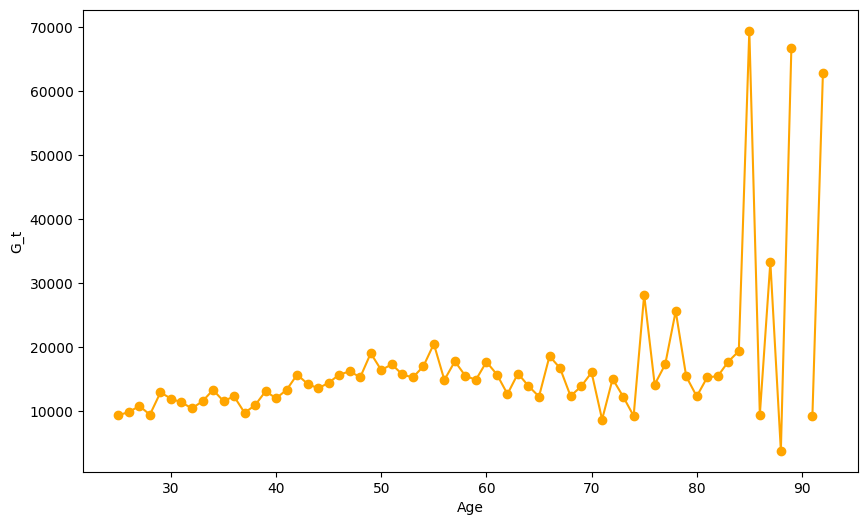

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(income_by_age['Age'], income_by_age['G_t'], marker='o', color='orange', label='Average Income')
plt.xlabel('Age')
plt.ylabel('G_t')
plt.show

In [522]:
#income_by_age.to_csv('G_t.csv', index=False)

In [ ]:
# Wealth Data
df_wealth = pd.read_csv("muc6a.csv")
df_wealth['household_id'] = df_wealth.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)
df_wealth.fillna(0, inplace=True)
df_wealth['m6ac7'] = df_wealth['m6ac7'] / 100
df_wealth

,tinh,huyen,xa,diaban,hoso,m6ama,m6ama1,m6ac3,m6ac4a,m6ac4b,m6ac5,m6ac6,m6ac7,household_id
0,101,1,3.0,1,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"101, 1, 3, 1, 13"
1,101,1,3.0,1,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"101, 1, 3, 1, 14"
2,101,1,3.0,1,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"101, 1, 3, 1, 15"
3,101,1,9.0,19,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"101, 1, 9, 19, 15"
4,101,1,9.0,19,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"101, 1, 9, 19, 19"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,823,13,12.0,25,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"823, 13, 12, 25, 15"
18144,823,13,12.0,25,19,2.0,0.0,1.0,0.0,1996.0,15000.0,45000.0,1.0,"823, 13, 12, 25, 19"
18145,823,13,17.0,1,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"823, 13, 17, 1, 13"
18146,823,13,17.0,1,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"823, 13, 17, 1, 14"


KeyError: 'm6ac6'

In [ ]:
df_wealth2 = pd.read_csv('muc6b.csv')
df_wealth2['household_id'] = df_wealth2.apply(
    lambda row: ', '.join([str(int(row[col])) if not pd.isnull(row[col]) else '' for col in ['tinh', 'huyen', 'xa', 'diaban', 'hoso']]),
    axis=1
)
df_wealth2.fillna(0, inplace=True)
df_appliances = df_wealth2[['household_id', 'm6bc6']]
household_appliances = df_appliances.groupby('household_id')['m6bc6'].sum().reset_index()
household_appliances.rename(columns={'m6bc6': 'Total Household Value of Appliances'}, inplace=True)
df_appliances= df_appliances.merge(household_appliances, on='household_id', how='left')
df_appliances = df_appliances.drop_duplicates(subset='household_id', keep='first')
df_appliances

,household_id,m6bc6,Total Household Value of Appliances
0,"101, 1, 3, 1, 13",1700.0,21950.0
14,"101, 1, 3, 1, 14",2500.0,87750.0
37,"101, 1, 3, 1, 15",500.0,63500.0
53,"101, 1, 9, 19, 15",1700.0,21800.0
65,"101, 1, 9, 19, 19",500.0,35200.0
...,...,...,...
102075,"823, 13, 12, 25, 15",150.0,450.0
102078,"823, 13, 12, 25, 19",400.0,11200.0
102083,"823, 13, 17, 1, 13",150.0,1750.0
102086,"823, 13, 17, 1, 14",200.0,1550.0
